### Read the input image

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


10993664/11490434 [===========================>..] - ETA: 0s

In [20]:

sample1=x_train[1]
sample2=x_train[3]
sample1.shape,sample2.shape , y_train[1], y_train[3]

((28, 28), (28, 28), 0, 1)

In [21]:
# import the needed libraries
import tensorflow as tf
import tensorflow.contrib.tensorrt as trt # must import this although we will not use it explicitly
from tensorflow.python.platform import gfile
from PIL import Image
import numpy as np
import time
from matplotlib import pyplot as plt

# read the testing images (only for example)

input_img = np.concatenate((sample1.reshape((1, 28, 28, 1)), 
                            sample2.reshape((1, 28, 28, 1))), 
                           axis=0)

### Function to read ".pb" model (TensorRT model is stored in ".pb")

In [22]:
# function to read a ".pb" model 
# (can be used to read frozen model or TensorRT model)
def read_pb_graph(model):
    with gfile.FastGFile(model,'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
    return graph_def

### Perform inference using TensorRT model

In [23]:
# variable
TENSORRT_MODEL_PATH = './model/TensorRT_model.pb'

graph = tf.Graph()
with graph.as_default():
    with tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.50))) as sess:
        # read TensorRT model
        trt_graph = read_pb_graph(TENSORRT_MODEL_PATH)

        # obtain the corresponding input-output tensor
        tf.import_graph_def(trt_graph, name='')
        input = sess.graph.get_tensor_by_name('input_tensor_input:0')
        output = sess.graph.get_tensor_by_name('output_tensor/Softmax:0')

        # in this case, it demonstrates to perform inference for 50 times
        total_time = 0; n_time_inference = 50
        out_pred = sess.run(output, feed_dict={input: input_img})
        for i in range(n_time_inference):
            t1 = time.time()
            out_pred = sess.run(output, feed_dict={input: input_img})
            t2 = time.time()
            delta_time = t2 - t1
            total_time += delta_time
            print("needed time in inference-" + str(i) + ": ", delta_time)
        avg_time_tensorRT = total_time / n_time_inference
        print("average inference time: ", avg_time_tensorRT)

needed time in inference-0:  0.001100778579711914
needed time in inference-1:  0.0008721351623535156
needed time in inference-2:  0.0008769035339355469
needed time in inference-3:  0.0008478164672851562
needed time in inference-4:  0.0009539127349853516
needed time in inference-5:  0.0030603408813476562
needed time in inference-6:  0.0008563995361328125
needed time in inference-7:  0.0008900165557861328
needed time in inference-8:  0.0008425712585449219
needed time in inference-9:  0.0009315013885498047
needed time in inference-10:  0.0008451938629150391
needed time in inference-11:  0.0008246898651123047
needed time in inference-12:  0.0008881092071533203
needed time in inference-13:  0.0008909702301025391
needed time in inference-14:  0.0008547306060791016
needed time in inference-15:  0.000873565673828125
needed time in inference-16:  0.0008332729339599609
needed time in inference-17:  0.0009016990661621094
needed time in inference-18:  0.0008265972137451172
needed time in inference

### Perform inference using the original tensorflow model

In [24]:
# variable
FROZEN_MODEL_PATH = './model/frozen_model.pb'

graph = tf.Graph()
with graph.as_default():
    with tf.Session() as sess:
        # read TensorRT model
        frozen_graph = read_pb_graph(FROZEN_MODEL_PATH)

        # obtain the corresponding input-output tensor
        tf.import_graph_def(frozen_graph, name='')
        input = sess.graph.get_tensor_by_name('input_tensor_input:0')
        output = sess.graph.get_tensor_by_name('output_tensor/Softmax:0')

        # in this case, it demonstrates to perform inference for 50 times
        total_time = 0; n_time_inference = 50
        out_pred = sess.run(output, feed_dict={input: input_img})
        for i in range(n_time_inference):
            t1 = time.time()
            out_pred = sess.run(output, feed_dict={input: input_img})
            t2 = time.time()
            delta_time = t2 - t1
            total_time += delta_time
            print("needed time in inference-" + str(i) + ": ", delta_time)
        avg_time_original_model = total_time / n_time_inference
        print("average inference time: ", avg_time_original_model)
        print("TensorRT improvement compared to the original model:", avg_time_original_model/avg_time_tensorRT)

needed time in inference-0:  0.0013837814331054688
needed time in inference-1:  0.0012083053588867188
needed time in inference-2:  0.0012311935424804688
needed time in inference-3:  0.0013167858123779297
needed time in inference-4:  0.0011591911315917969
needed time in inference-5:  0.0029709339141845703
needed time in inference-6:  0.001577615737915039
needed time in inference-7:  0.0011119842529296875
needed time in inference-8:  0.0012359619140625
needed time in inference-9:  0.0011501312255859375
needed time in inference-10:  0.0011491775512695312
needed time in inference-11:  0.0011150836944580078
needed time in inference-12:  0.0011501312255859375
needed time in inference-13:  0.0011012554168701172
needed time in inference-14:  0.0011475086212158203
needed time in inference-15:  0.0011734962463378906
needed time in inference-16:  0.0014050006866455078
needed time in inference-17:  0.0011720657348632812
needed time in inference-18:  0.0011777877807617188
needed time in inference-1

### Plot the prediction result

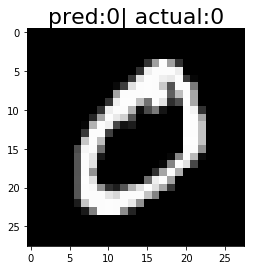

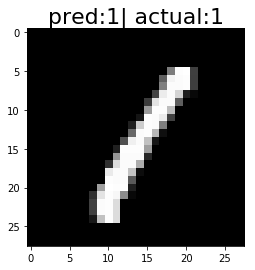

In [27]:
# plot the prediction output
plt.figure('img 1')
plt.imshow(sample1, cmap='gray')
plt.title('pred:' + str(np.argmax(out_pred[0])) + '| actual:'+str(y_train[1]), fontsize=22)

plt.figure('img 2')
plt.imshow(sample2, cmap='gray')
plt.title('pred:' + str(np.argmax(out_pred[1]))+ '| actual:'+str(y_train[3]), fontsize=22)
plt.show()